# 4.0 Prepare CITE-seq Dashboard

In [1]:
import bqplot as bq

import pandas as pd

import ipywidgets as widgets
import numpy as np
from bqplot import pyplot as plt
import bqplot
from ipywidgets import HBox
import umap

from clustergrammer2 import net
df = {}

In [2]:
from copy import deepcopy

In [3]:
def make_df_from_cols(cols):
    inst_col = cols[0]

    cat_titles = []
    for inst_info in inst_col[1:]:
        inst_title = inst_info.split(': ')[0]
        cat_titles.append(inst_title)

    clean_cols = []
    for inst_col in cols:
        inst_clean = []
        for inst_info in inst_col:
            if ': ' in inst_info:
                inst_clean.append(inst_info.split(': ')[1])
            else:
                inst_clean.append(inst_info)
        clean_cols.append(tuple(inst_clean))

    df_ini = pd.DataFrame(data=clean_cols).set_index(0)
    mat = df_ini.get_values()
    rows = df_ini.index.tolist()

    print(mat.shape)
    print(len(rows))
    print(len(clean_cols))

    df_meta = pd.DataFrame(data=mat, index=rows, columns=cat_titles)

    return df_meta

In [4]:
def make_umap_plot(df, cat_index, colors_dict, title, min_dist=1.0, n_neighbors=20, s=5.0, alpha=1.0, 
                   figsize=(10,10)):
    cols = df.columns.tolist()
    cats = [x[cat_index] for x in cols]

    list_colors = [colors_dict[x.split(': ')[1]] for x in cats]
    
#     list_colors = []
#     for inst_index in range(len(cats)):
        
#         inst_cat = cats[inst_index]
        
#         # fix cd8 labeling
#         if inst_cat == 'Cell Type: CD8':

#             # print('HERE')
#             inst_cat = 'Cell Type: CD8__T_Cells'
            

#         inst_color = colors_dict[inst_cat.split(': ')[1]]
#         list_colors.append(inst_color)
    
    embedding = umap.UMAP(n_neighbors=n_neighbors, random_state=99,
                          min_dist=min_dist,
                          metric='correlation').fit_transform(df.transpose())
    
    df_umap = pd.DataFrame(data=embedding, columns=['x', 'y'])
    df_umap.plot(kind='scatter', x='x', y='y',  c=list_colors, alpha=alpha, s=s, figsize=figsize, 
                 title=title)
    
    return df_umap

In [5]:
cat_colors = net.load_json_to_dict('../data/category_colors.json')
cat_colors['Ungated'] = 'white'

In [6]:
def clean_cell_types(df):
    new_cols = [(x[0], x[1], x[2].split('-')[0]) if '-' in x[2] else x for x in df.columns.tolist()]

    clean_cols = []
    for new_col in new_cols:
        if new_col[2] == 'Cell Type: CD8':
            new_col = (new_col[0], new_col[1], 'Cell Type: CD8__T_Cells')
            
        clean_cols.append(new_col)
        
    df.columns = clean_cols
    return df

In [8]:
net.load_file('../data/citeseq_adt_pbmc.txt')
df['pbmc'] = clean_cell_types(net.export_df())
print('pbmc', df['pbmc'].shape)

net.load_file('../data/citeseq_adt_plaque.txt')
df['plaque'] = clean_cell_types(net.export_df())
print('plaque', df['plaque'].shape)

net.load_file('../data/citeseq_adt_merge.txt')
df['adt'] = clean_cell_types(net.export_df())
print('pbmc and plaque', df['adt'].shape)

pbmc (21, 3589)
plaque (21, 1643)
pbmc and plaque (21, 5232)


In [9]:
df['adt'].head()

,"(GCATGCGTCCATGAGT, Tissue: Plaque, Cell Type: Plasma_Cells)","(CGAGCACAGAAACCTA, Tissue: Plaque, Cell Type: CD8__T_Cells)","(TGAGCCGAGTCCGTAT, Tissue: Plaque, Cell Type: CD4__T_Cells)","(TCGTACCTCTCCAACC, Tissue: Plaque, Cell Type: NK_Cells)","(TGGGAAGAGCTGTTCA, Tissue: Plaque, Cell Type: B_Cells)","(GTGAAGGTCACATAGC, Tissue: Plaque, Cell Type: CD8__T_Cells)","(ATAGACCTCTTTCCTC, Tissue: Plaque, Cell Type: B_Cells)","(TTGGAACAGTGGTAGC, Tissue: Plaque, Cell Type: CD8__T_Cells)","(TGTGGTACAGTACACT, Tissue: Plaque, Cell Type: CD4__T_Cells)","(TCGTACCAGGACGAAA, Tissue: Plaque, Cell Type: CD4__T_Cells)",...,"(AGATTGCGTCAACATC, Tissue: PBMC, Cell Type: Monocytes)","(GCAAACTTCAGCTTAG, Tissue: PBMC, Cell Type: Monocytes)","(ATCATGGGTCCCTACT, Tissue: PBMC, Cell Type: Monocytes)","(CTACACCTCCTATTCA, Tissue: PBMC, Cell Type: Monocytes)","(ACGGGCTGTCATACTG, Tissue: PBMC, Cell Type: Monocytes)","(CATCGAATCGGTCTAA, Tissue: PBMC, Cell Type: Monocytes)","(ACTGAGTGTGACCAAG, Tissue: PBMC, Cell Type: Monocytes)","(GTTTCTACAAGACACG, Tissue: PBMC, Cell Type: Monocytes)","(AGACGTTAGGAGCGTT, Tissue: PBMC, Cell Type: Monocytes)","(ACAGCTAGTAAATGAC, Tissue: PBMC, Cell Type: Monocytes)"
CD11b,-0.741397,-1.144595,-0.829223,-0.829223,-0.829223,-1.144595,-0.741397,-1.144595,-1.144595,-0.925991,...,2.000972,1.903937,2.291251,1.832014,2.243882,2.329188,2.094028,2.209830,2.042786,1.903937
CD11c,-0.857509,-0.993075,-0.993075,-0.993075,-0.857509,-0.993075,-0.857509,-0.857509,-0.726954,-0.726954,...,1.961901,1.965482,2.101061,1.986578,2.319634,1.748751,2.330179,2.143620,2.146366,2.356856
CD123,-0.852580,-1.181463,-1.371665,0.150292,-1.008834,-1.008834,-1.579218,-1.579218,-0.582084,-0.356116,...,1.377121,1.600015,2.443003,2.239413,3.037642,0.898216,2.573053,2.239413,2.296541,1.933007
CD14,-1.272861,-1.097052,-0.882733,-0.658956,-1.373823,-0.658956,-1.485204,-1.373823,-0.610949,-1.272861,...,1.970577,2.273878,2.552508,2.067801,2.171477,2.109775,2.420598,2.132591,2.414464,2.191063
CD141,-0.459174,-1.627938,-0.459174,-0.584484,-1.627938,-1.043727,-0.722724,-1.423874,-1.043727,-1.227353,...,1.320835,0.931243,2.064636,1.585369,2.086931,1.703928,2.240316,2.053304,2.348422,1.750840


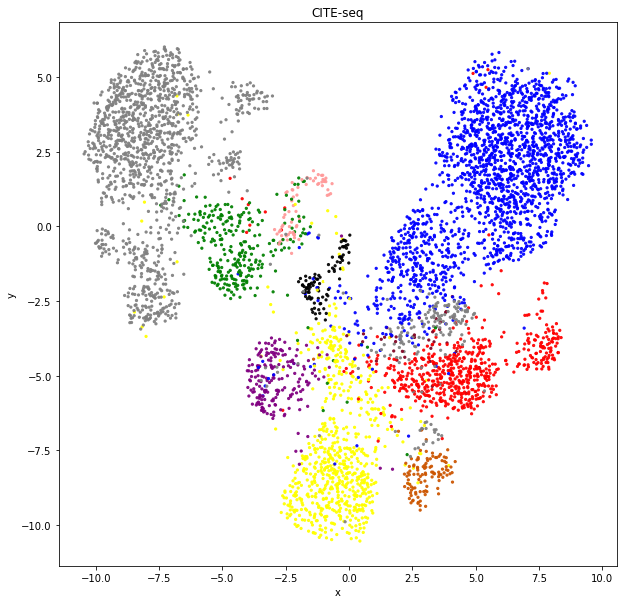

In [10]:
df_umap = make_umap_plot(df['adt'], 2, cat_colors, 'CITE-seq', alpha=0.9, n_neighbors=20, min_dist=0.75)

In [12]:
df_umap_merged = deepcopy(df_umap)
df_umap_merged.columns = ['adt-umap-x', 'adt-umap-y']
df_umap_merged.index = [x[0] for x in df['adt'].columns.tolist()]
df_umap_merged.head()

,adt-umap-x,adt-umap-y
GCATGCGTCCATGAGT,4.085758,-8.558136
CGAGCACAGAAACCTA,5.773377,-4.613087
TGAGCCGAGTCCGTAT,4.722701,4.959948
TCGTACCTCTCCAACC,-1.196223,-3.252830
TGGGAAGAGCTGTTCA,-2.365181,-6.090572


In [14]:
df_meta = make_df_from_cols(df['adt'].columns.tolist())
df_meta.head()

(5232, 2)
5232
5232


,Tissue,Cell Type
GCATGCGTCCATGAGT,Plaque,Plasma_Cells
CGAGCACAGAAACCTA,Plaque,CD8__T_Cells
TGAGCCGAGTCCGTAT,Plaque,CD4__T_Cells
TCGTACCTCTCCAACC,Plaque,NK_Cells
TGGGAAGAGCTGTTCA,Plaque,B_Cells


In [15]:
df_meta['Cell Type'].value_counts()

CD4__T_Cells       1830
Monocytes          1192
NK_Cells            698
CD8__T_Cells        589
Macrophages         270
B_Cells             191
CD8_CD4_T_Cells     154
Plasma_Cells        107
pDCs                 91
CD1c__DCs            65
NKT_Cells            36
Ungated               9
Name: Cell Type, dtype: int64

In [16]:
df_meta_new = pd.concat([df_umap_merged, df_meta], axis=1, sort=True)
df_meta_new.head()

,adt-umap-x,adt-umap-y,Tissue,Cell Type
AAACCTGCATACGCCG,-7.237295,-1.936900,PBMC,Monocytes
AAACCTGGTCTGCGGT,-0.862378,-8.616483,PBMC,NK_Cells
AAACCTGTCACCACCT,3.621271,-5.740807,PBMC,CD8__T_Cells
AAACCTGTCATCGCTC,7.570086,0.993631,PBMC,CD4__T_Cells
AAACCTGTCATGTCTT,-9.269570,4.467438,PBMC,Monocytes


### Save Data to Parquets

In [17]:
!mkdir ../data/citeseq-dashboard/

mkdir: ../data/citeseq-dashboard/: File exists


In [18]:
df_meta_new.to_parquet('../data/citeseq-dashboard/meta_cell.parquet')

In [21]:
df['adt-export'] = deepcopy(df['adt'])
df['adt-export'].columns = [x[0] for x in df['adt'].columns.tolist()]

In [22]:
df['adt-export'].to_parquet('../data/citeseq-dashboard/adt.parquet')